In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir('..')

In [3]:
os.chdir('data')

In [4]:
os.getcwd()

'C:\\Users\\Utente\\Documents\\PPG-p2\\data'

In [5]:
df = pd.read_table('1-Tommaso.txt')

In [6]:
df = df.iloc[:,-3:]

In [7]:
df = df.rename(columns={'PPG_RED.' : 'Red', 'PPG_IR.': 'IR', 'PPG_GREEN.':'Green'})

In [8]:
df['tempo'] = df.index/100

In [9]:
df

,Red,IR,Green,tempo
0,3160,2627,0,0.00
1,3203,2666,0,0.01
2,3241,2718,0,0.02
3,3296,2755,0,0.03
4,3343,2809,0,0.04
...,...,...,...,...
9256,1070,893,0,92.56
9257,1065,889,0,92.57
9258,1067,910,0,92.58
9259,1069,894,0,92.59


<AxesSubplot:xlabel='tempo'>

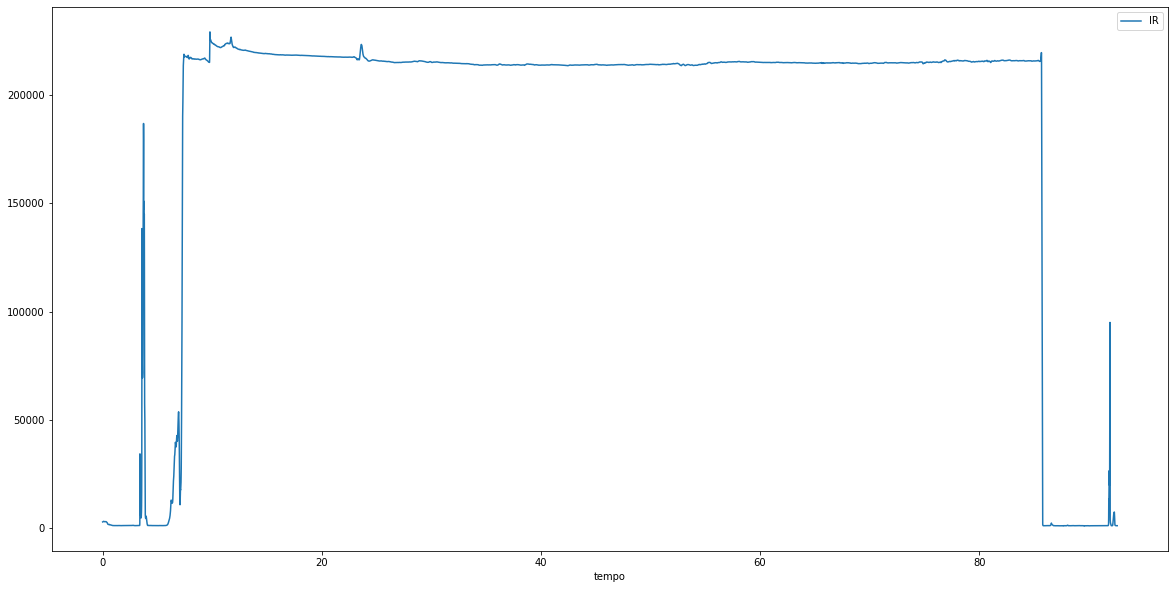

In [10]:
df.plot(x='tempo',y= 'IR', figsize=(20,10))

<AxesSubplot:xlabel='tempo'>

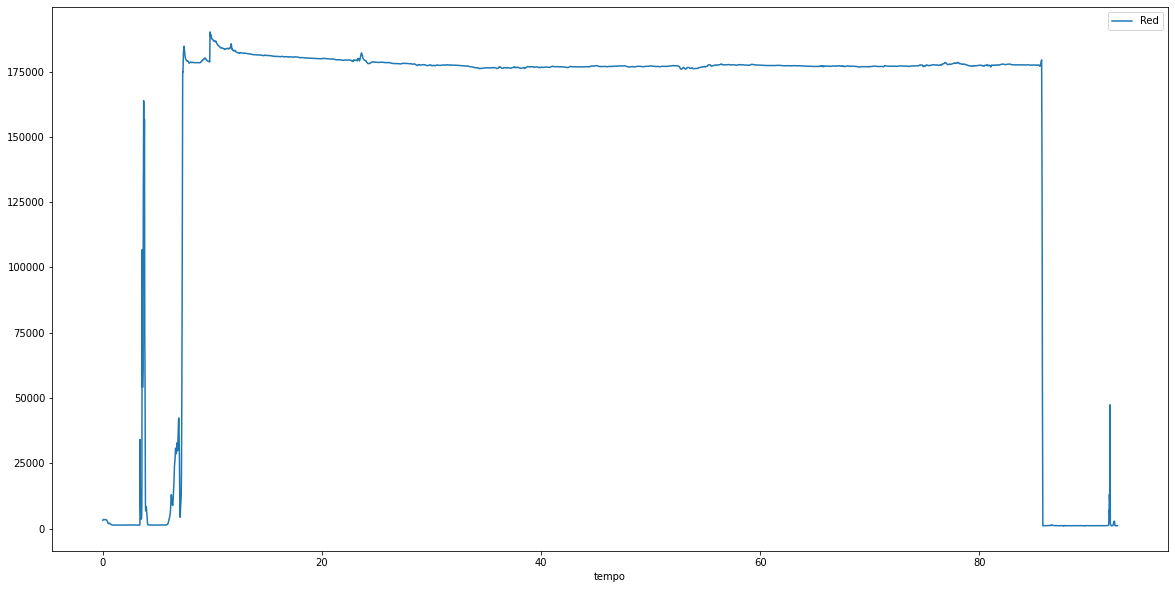

In [11]:
df.plot(x='tempo',y= 'Red', figsize=(20,10))

In [12]:
def taglio(df):
    print(len(df))
    for i in range(len(df)-1):
        
        if((df.at[i+1, 'tempo'] - df.at[i, 'tempo'])>0.05):
            print(df.at[i+1, 'tempo'], df.at[i, 'tempo'])
            df = df[0:i]
            break
    return df

In [13]:
df = taglio(df[df.IR> 190000].reset_index(drop=True).copy())

7841


<AxesSubplot:xlabel='tempo'>

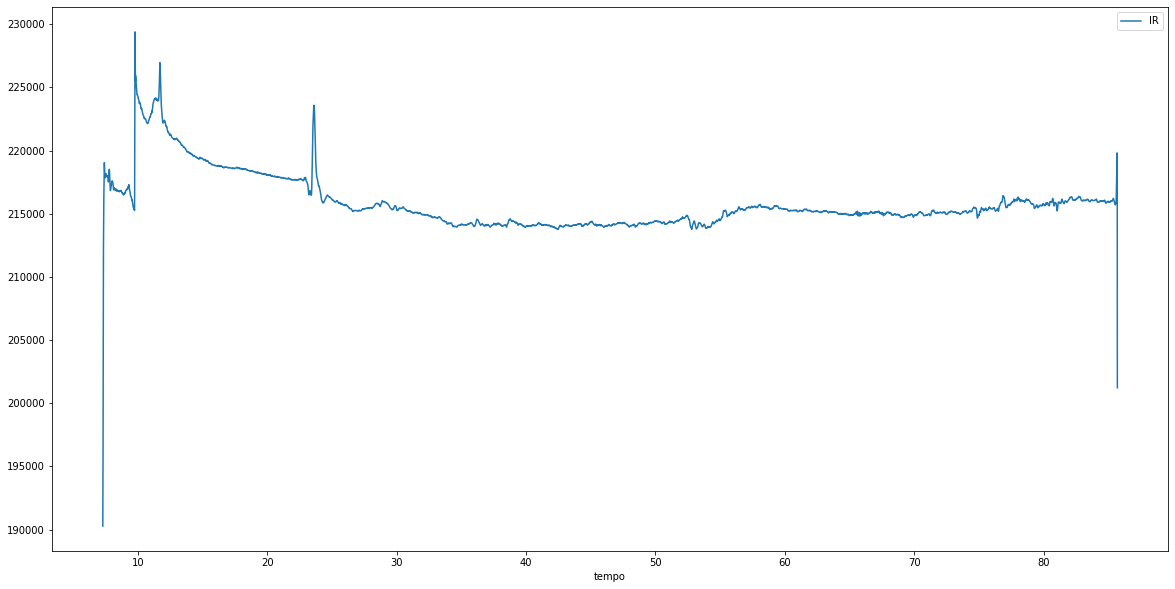

In [14]:
df.plot(x='tempo',y= 'IR', figsize=(20,10))

<AxesSubplot:xlabel='tempo'>

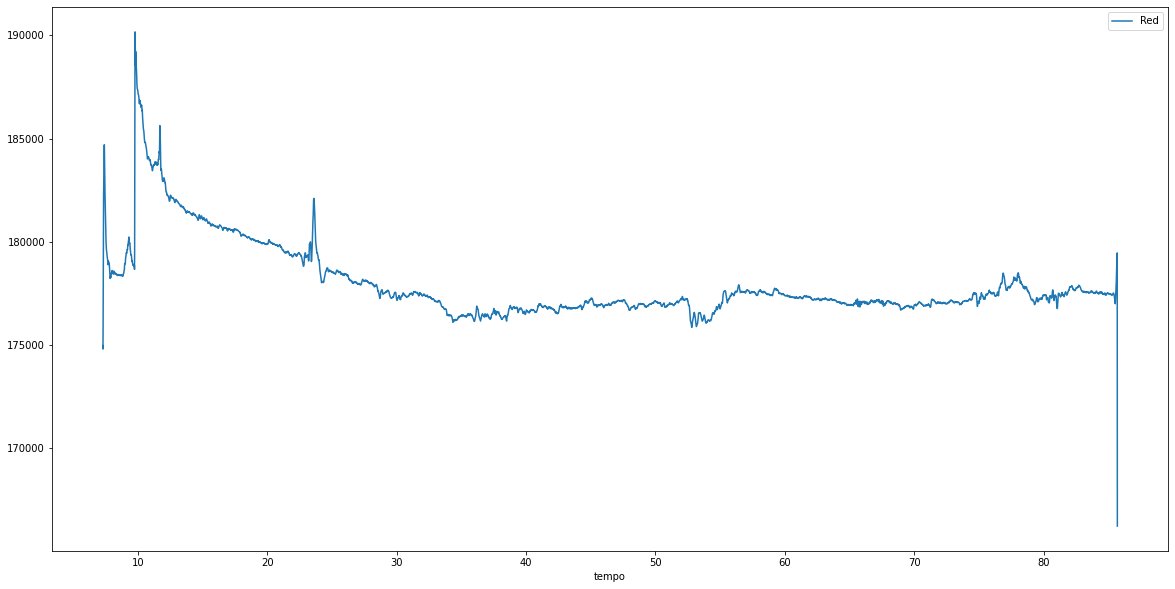

In [15]:
df.plot(x='tempo',y= 'Red', figsize=(20,10))

In [16]:
from scipy.signal import butter, filtfilt, find_peaks

In [17]:
def filtraggio(df, inizio, fine, tipo):
    b,a = butter(2,4,'lowpass',fs = 100)
    segnale_pulito = filtfilt(b,a, df[(df.tempo >= inizio)
                                & (df.tempo <=fine)][tipo])
    return segnale_pulito


In [18]:
def graphpicchi(valori, inizio, fine, tipo):
    
    segnale_pulito = filtraggio(valori, inizio, fine, tipo)
   
    picchi = find_peaks(segnale_pulito,distance=45)[0]
    plt.figure(figsize=(20,10))
    
    
    plt.plot(np.arange(len(segnale_pulito))*1/100, segnale_pulito)
    plt.scatter([i/100 for i in picchi], [segnale_pulito[i] for i in picchi], color = 'red')
    
    print(round(100/(picchi[1:len(picchi)]- picchi[0:len(picchi)-1]).mean()*60,2), 'bpm')

81.93 bpm


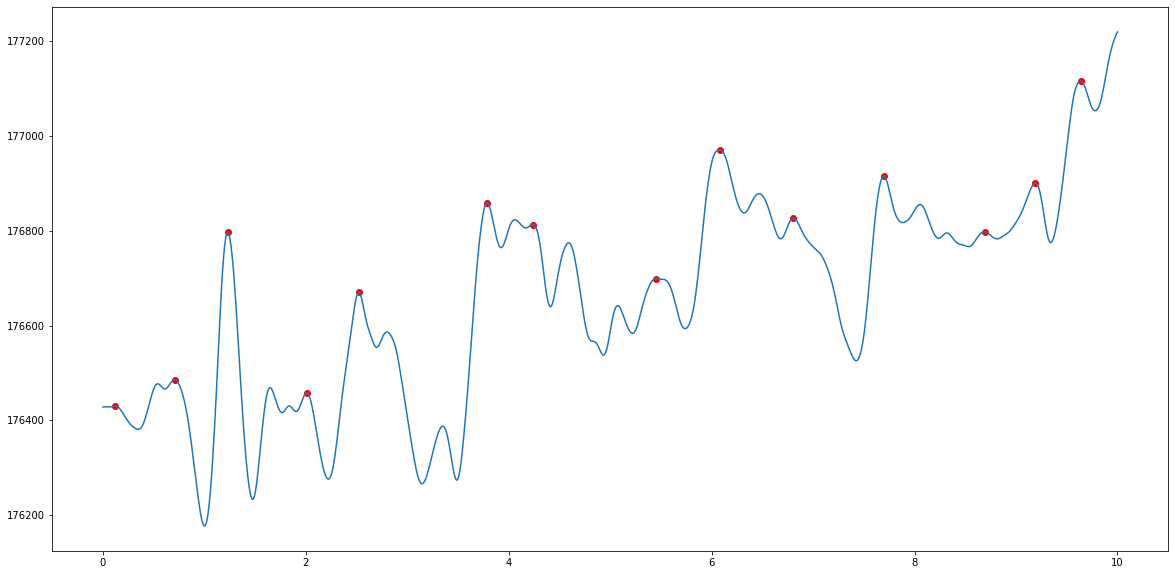

In [19]:
graphpicchi(df, 35, 45, 'Red')

75.08 bpm


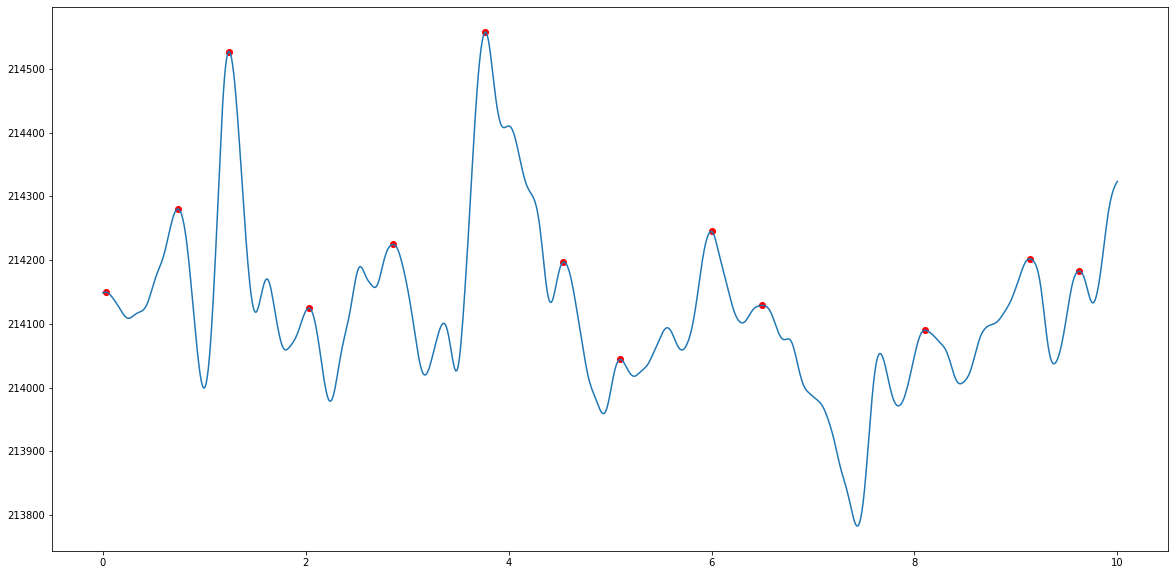

In [20]:
graphpicchi(df, 35, 45, 'IR')